<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Создание-признаков-и-выборок-для-моделей" data-toc-modified-id="Создание-признаков-и-выборок-для-моделей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Создание признаков и выборок для моделей</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Обучим-константную-модель--DummyRegressor" data-toc-modified-id="Обучим-константную-модель--DummyRegressor-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Обучим константную модель  <code>DummyRegressor</code></a></span></li><li><span><a href="#Обучим-модель-линейной-регрессии-LinearRegression" data-toc-modified-id="Обучим-модель-линейной-регрессии-LinearRegression-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Обучим модель линейной регрессии <code>LinearRegression</code></a></span></li><li><span><a href="#Обучим-модель-градиентного-бустинга-LGBMRegressor()" data-toc-modified-id="Обучим-модель-градиентного-бустинга-LGBMRegressor()-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Обучим модель градиентного бустинга <code>LGBMRegressor()</code></a></span></li><li><span><a href="#Обучим-модель-градиентного-бустинга-CatBoostRegressor()" data-toc-modified-id="Обучим-модель-градиентного-бустинга-CatBoostRegressor()-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Обучим модель градиентного бустинга <code>CatBoostRegressor()</code></a></span></li></ul></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Итоговый-вывод:" data-toc-modified-id="Итоговый-вывод:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Итоговый вывод:</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Необходимо построить модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Ход исследования:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

Произведем загрузку необходимых библиотек, классов, функции. 

In [1]:
# Установим библиотеки:

# установим библиотеку lightgbm
!pip install lightgbm -q

# установим актуальную версию библиотеки sklearn
!pip install -U scikit-learn -q

# установим catboost
!pip install catboost -q

In [2]:
# Импортируем библиотеку pandas для работы с датафреймом
import pandas as pd

# Импортируем модуль pyplot библиотеки matplotlib для построения графиков
import matplotlib.pyplot as plt

# Импортируем библиотеку seaborn для построения графиков
import seaborn as sns

# Импортируем библиотеку numpy  для математических операций 
import numpy as np

# Импортируем класс pipeline для работы с пайплайнами
from sklearn.pipeline import Pipeline

# Импортируем класс ColumnTransformer для работы с данными разного типа в одном наборе
from sklearn.compose import ColumnTransformer

# Импортируем библиотеку lightgbm для модели LightGBM
import lightgbm as lgb

# Импортируем функцию seasonal_decompose() для разложения временного рядя на тренд, сезонность и остатки
from statsmodels.tsa.seasonal import seasonal_decompose

# Импортируем функцию train_test_split для разделения данных
from sklearn.model_selection import train_test_split

# Импортируем: 
# класс StandardScaler для стандартизации данных
# класс OneHotEncoder для кодирования данных
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Импортируем класс GridSearchCV 
# Импортируем объект TimeSeriesSplit
# Импортируем функцию cross_val_score
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, cross_val_score

# Импортируем:
# класс LinearRegression для линейной регрессии
# класс DummyClassifier константная модель
# класс CatBoostRegressor для градиентного регрессии бустинга
from sklearn.linear_model import LinearRegression 
from sklearn.dummy import DummyRegressor
from catboost import CatBoostRegressor


# Импортируем метрики
from sklearn.metrics import root_mean_squared_error

import warnings
warnings.filterwarnings('ignore')

Загрузим данные в датафрейм `pandas`.

In [3]:
# Поместим датасет в переменную taxi
# Столбец datetime переведем в формат datetime64 и сделаем индексным
taxi = pd.read_csv('/Users/eduardgorbacev/Documents/GitHub/ML_taxi_orders_at_airports/taxi.csv', parse_dates=[0], index_col=[0])

In [4]:
# Выведем информацию о датасете
taxi.info()

taxi.head(3)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28


Итак, мы имеем датасет с индексным столбцом, в котором расположены даты и время, а так же столбец `num_orders` - количество заказов, это наш **целевой признак**. В датасете представлены данные о кол-ве заказов с 01 марта 2018 по 31 августа 2018 года с интервалом 10 минут. В задаче необходимо спрогнозировать количество заказов такси на следующий час, поэтому проведем ресемплирование датасета и изменим интервал временного ряда в 1 час и отобразим сумму заказов за каждый час. Для начала проверим, расположены ли даты и время в хронологическом порядке.

In [5]:
# Проверим, являются ли даты в индексном столбце монотонно возрастающими
taxi.index.is_monotonic_increasing

True

Итак, метод выдал результат True, что означает, что даты и время расположены в хронологическом порядке, что важно для задачи прогнозирования временного ряда.

In [6]:
# Применим метод resample() и функцию sum()
taxi = taxi.resample('1H').sum()

In [7]:
# Выведем информацию о датасете
taxi.info()

taxi.head(3)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: h
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71


Итак, теперь мы имеем данные о заказах с интервалом в 1 час. Кол-во строк датасета сократилось с 26496 до 4416.

In [8]:
# Проверим датасет на наличие пропусков
pd.DataFrame(taxi.isna().sum()).style.background_gradient('coolwarm')

,0
num_orders,0


Пропуски в датасете отсутствуют.

**Промежуточный итог:**

- Столбец `datetime` привели к формату `datetime64` и сделали его индексным;
- Столбец `num_orders` - количество заказов, это **целевой признак**;
- Даты и время расположены в хронологическом порядке;
- Провели ресемплирование датасета - установили интервал в 1 час;
- Пропуски в датасете отсутствуют.

## Анализ

Построим график и определим, стационарен ли временной рад нашего датасета или нет. Для наглядности добавим столбцы со скользящими средним и стандартным отклонением, размер окна возьмем равный 168 (посчитаем скользящие среднее и стандартное отклонение по неделям).

In [9]:
# Добавим столбец со скользящим средним 
taxi['mean'] = taxi['num_orders'].rolling(168).mean()

# Добавим столбец со скользящим стандартным отклонением 
taxi['std'] = taxi['num_orders'].rolling(168).std()

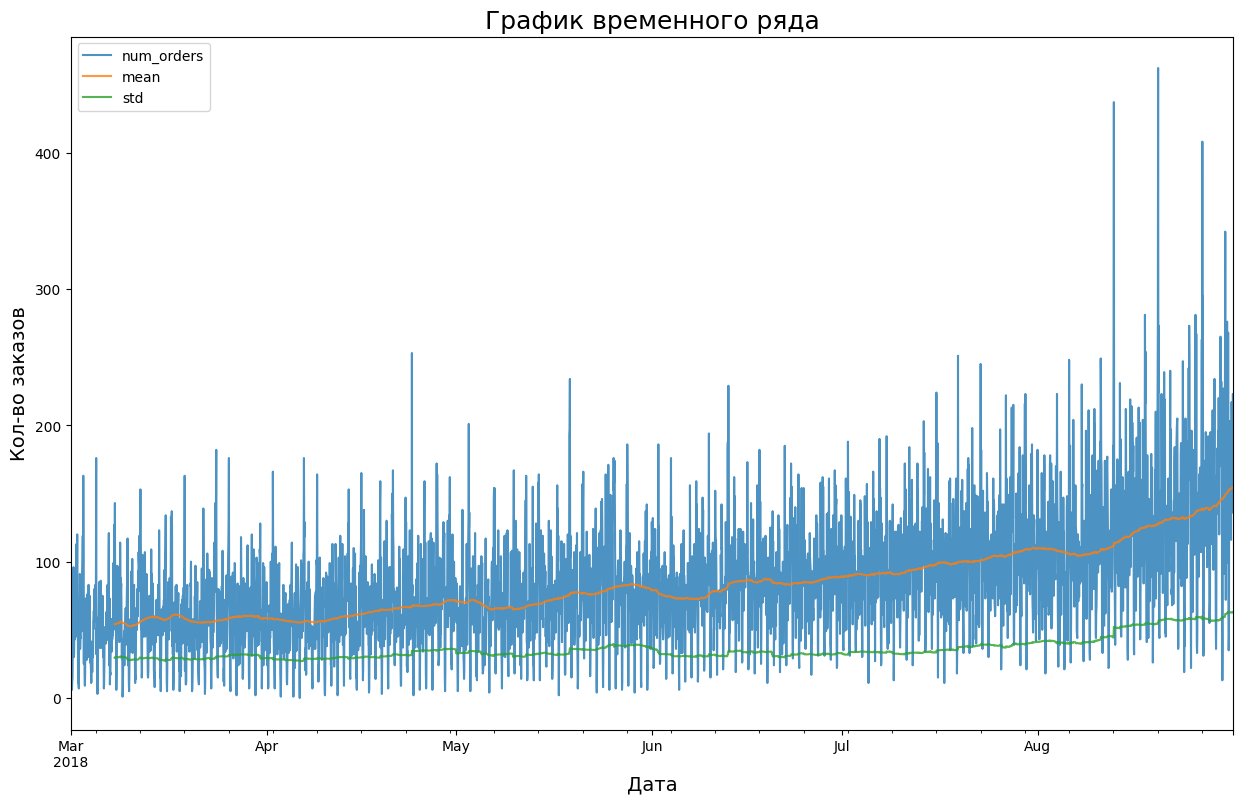

In [10]:
# Построим график
taxi.plot(figsize=(15,9), alpha=0.8)
plt.title('График временного ряда', fontsize=18)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Кол-во заказов', fontsize=14)
plt.show()

Итак, на графике мы видим, что скользящее среднее увеличивается на протяжении всего графика. Стандартное отклонение практически равномерное, за исключением августа месяца - на графике мы видим небольшой рост стандартного отклонения. Из этого мы можем сделать вывод, что временной ряд нашего датасета нестационарный. Для модели мы добавим разности временного ряда, так как они более стационарны, чем сам ряд.

**Построим график тренда заказов.**

In [11]:
# Применим функцию seasonal_decompose к датасету
decomposed = seasonal_decompose(taxi['num_orders'])

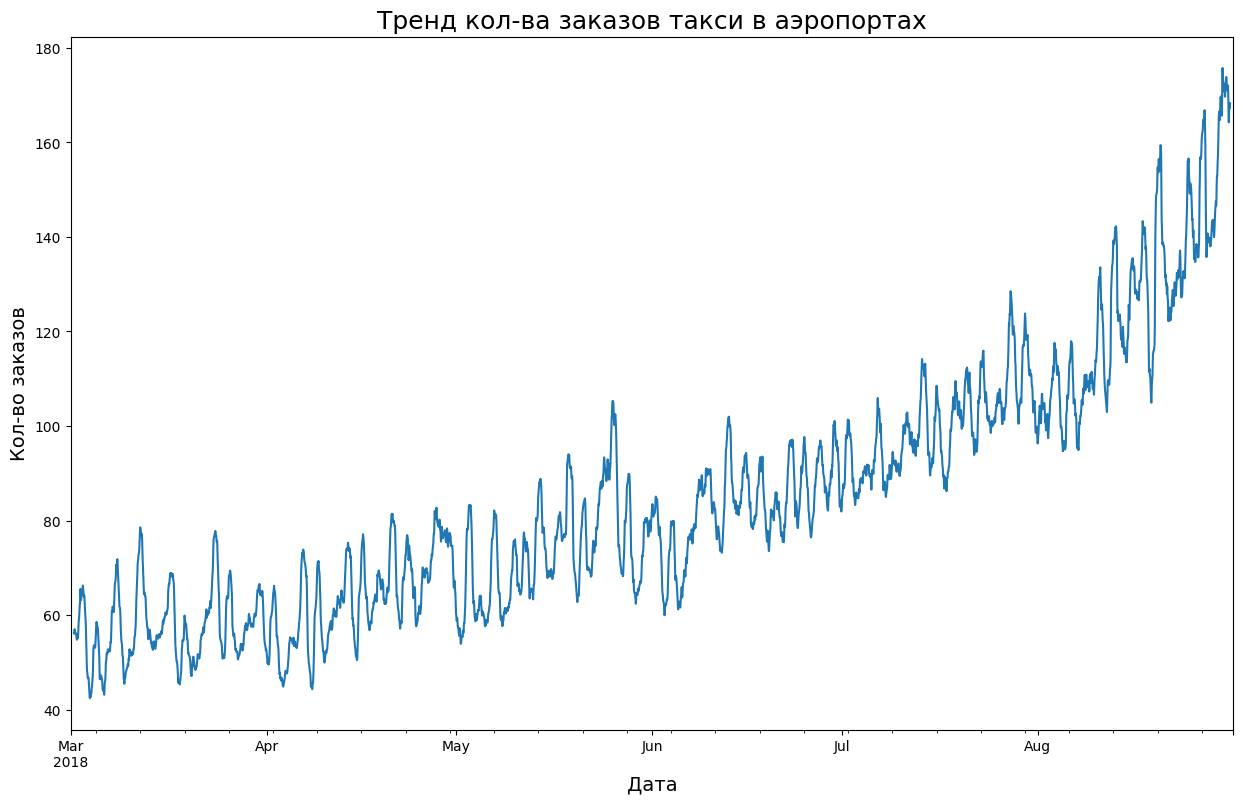

In [12]:
# Построим график тренда 
decomposed.trend.plot(figsize=(15,9))
plt.title('Тренд кол-ва заказов такси в аэропортах', fontsize=18)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Кол-во заказов', fontsize=14)
plt.show()

Итак, на графике мы можем заметить тренд к плавному увеличению числа заказов такси в аэропортах. Особенно рост заметен с июля месяц по август, как правило на летние месяцы приходится большое кол-во людей, отправляющихся в отпуск, а у студентов и школьников начинаются каникулы. 

**Построим график сезонности.**

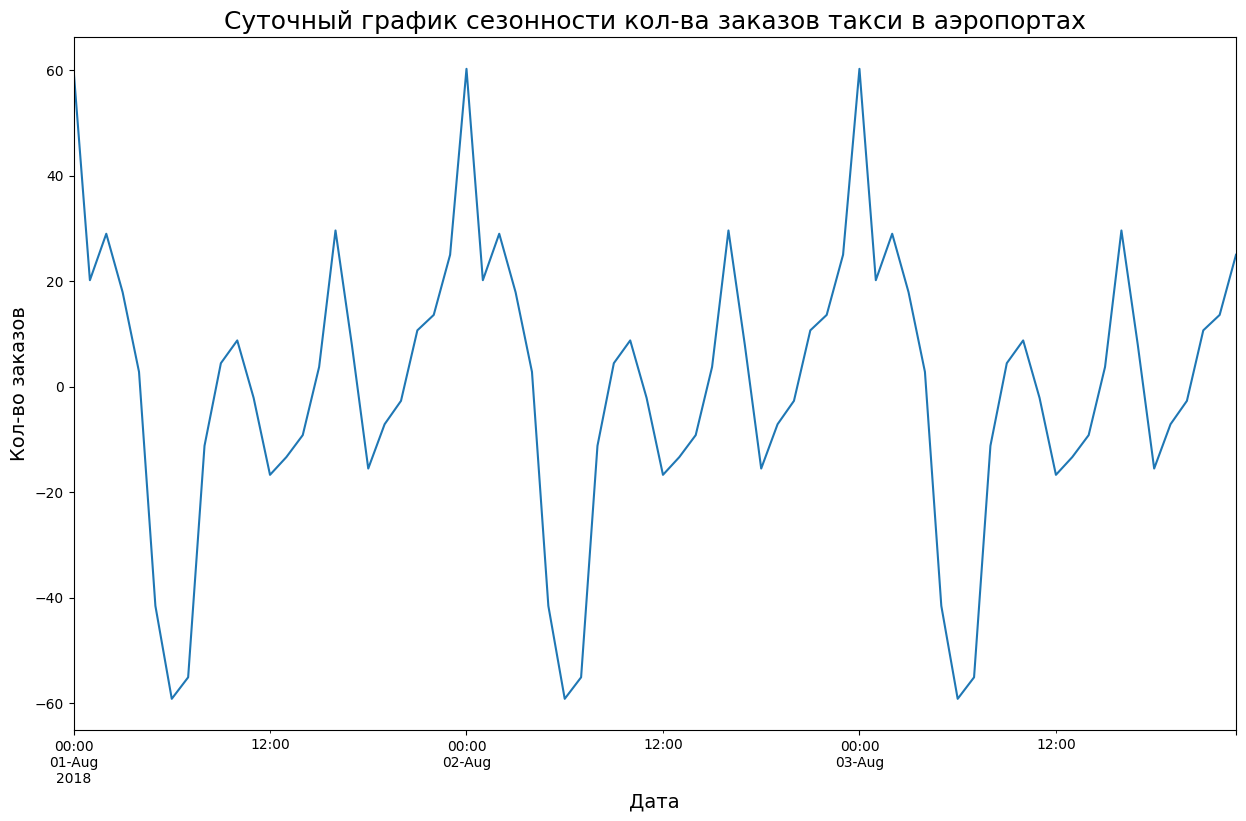

In [13]:
# Построим график сезонности, используя срез за три дня
decomposed.seasonal['08-01-2018':'08-03-2018'].plot(figsize=(15,9))
plt.title('Суточный график сезонности кол-ва заказов такси в аэропортах', fontsize=18)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Кол-во заказов', fontsize=14)
plt.show()

Итак, на графике мы имеем суточную сезонность кол-ва заказов такси в аэропортах (если мы используем срез за более длительный период - сезонность сохранится, так как она повторяется каждые сутки). На графике мы можем отметить пик заказов в 00:00 часов, а так же наименьшее кол-во заказов в 6:00 утра. Можно предположить, что пик пассажиров в аэропортах приходится на 00:00 часов, тогда как в 6:00 утра их наименьшее кол-во. 

Выше мы рассмотрели суточую сезонность. Сделаем ресемплинг данных по суткам и рассмотрим недельный график сезонности. 

In [14]:
# Применим функцию seasonal_decompose к датасету
decomposed_week = seasonal_decompose(taxi.resample('1D').sum()['num_orders'])

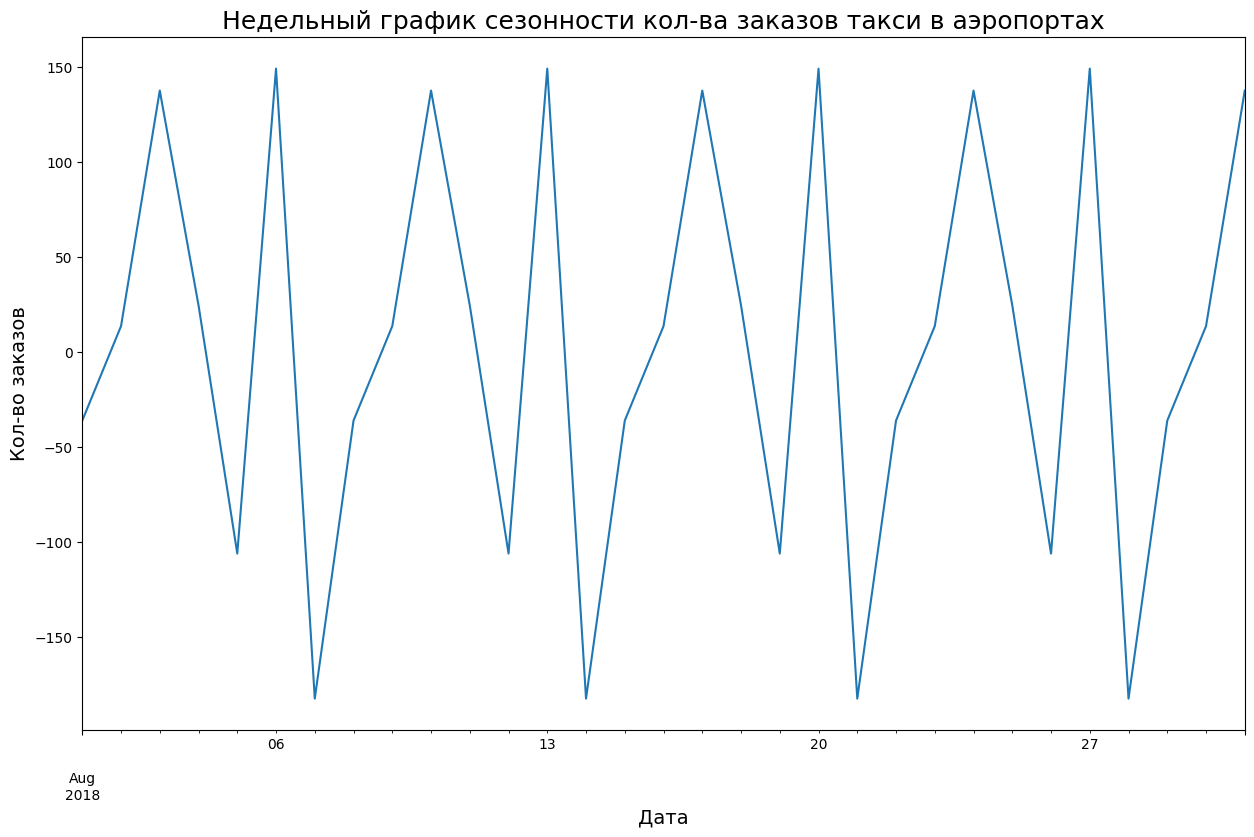

In [15]:
# Построим график сезонности, используя срез за месяц
decomposed_week.seasonal['08-01-2018':'08-31-2018'].plot(figsize=(15,9))
plt.title('Недельный график сезонности кол-ва заказов такси в аэропортах', fontsize=18)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Кол-во заказов', fontsize=14)
plt.show()

Итак, на графике недельной сезонности мы можем отметить пик кол-ва заказов 6, 13, 20 и 27 августа - в 2018 году на эти даты приходился **понедельник**. Так же значительное кол-во заказов приходится на 3, 10, 17 и 24 августа - в 2018 года на эти даты приходилась **пятница**. Наименьшее же кол-во заказов приходится на 7, 14, 21 и 28 августа - в 2018 году на эти даты приходился **вторник**, так же довольно малое кол-во заказов приходилось на 5, 12, 19 и 26 августа - в 2018 года на эти даты приходилось **воскресенье**.

Как правило часто люди улетают в пятницу на выходные, а возвращаются в понедельник. Во вторник же или воскресенье люди редко куда вылетают или возвращаются. 

**Промежуточный итог:**

- Временной ряд нашего датасета нестационарный;
- Скользящее среднее увеличивается на протяжении всего графика;
- Добавление разности временного ряда поможет сделать наш ряд более стационарным;
- Временной ряд имеет тренд к увеличению числа заказов такси в аэропортах, наибольший рост с июля месяц по август.
- Имеется суточная сезонность кол-ва заказов такси в аэропортах. Пик заказов в 00:00 часов, а наименьшее кол-во заказов в 6:00 утра.
- Имеется недельная сезонность кол-ва заказов такси в аэропортах. Пик заказов приходится на понедельник и пятницу, а наименьшее кол-во заказов на вторник и воскресенье.

## Обучение

### Создание признаков и выборок для моделей

Создадим следующие входящие признаки для нашей модели:

1. Календарные признаки - добавим столбцы: `day_of_week`, `hour` - так как ранее мы обнаружили суточную и недельную сезонности.
2. «Отстающие значения» - предыдущие значения временного ряда подскажут, будет ли функция x(t) расти или уменьшаться. Это будут столбцы `lag_1`, `lag_2` и т.д.
3. Скользящее среднее, при вычислении которого не будем включать текущее значение значение ряда, чтобы избежать утечку целевого признака. Данный признак задаст общий тренд временного ряда. Это будет столбец `rolling_mean`.

In [16]:
# Напишем функцию make_features(), которая создаcт вышесказанные входные признаки
def make_features(data, max_lag, rolling_mean_size):
    data['day_of_week'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data[f'lag_{lag}'] = data['num_orders'].shift(lag)
    
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

In [17]:
# Создадим входящие признаки функцией make_features()
make_features(taxi, 24, 24)

In [18]:
# Удалим из входящих признаков ранее созданные столбцы mean и std
taxi = taxi.drop(['mean', 'std'], axis=1)

In [19]:
# Выведем информацию о датасете
taxi.info()

taxi.head(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: h
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_orders    4416 non-null   int64  
 1   day_of_week   4416 non-null   int32  
 2   hour          4416 non-null   int32  
 3   lag_1         4415 non-null   float64
 4   lag_2         4414 non-null   float64
 5   lag_3         4413 non-null   float64
 6   lag_4         4412 non-null   float64
 7   lag_5         4411 non-null   float64
 8   lag_6         4410 non-null   float64
 9   lag_7         4409 non-null   float64
 10  lag_8         4408 non-null   float64
 11  lag_9         4407 non-null   float64
 12  lag_10        4406 non-null   float64
 13  lag_11        4405 non-null   float64
 14  lag_12        4404 non-null   float64
 15  lag_13        4403 non-null   float64
 16  lag_14        4402 non-null   float64
 17  lag_15        4401 non-null

,num_orders,day_of_week,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,2,85.0,124.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,4,66.0,71.0,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Новые входящие признаки успешно добавлены в датасет. Так как получить признаки `lag_` и `rolling_mean` для первых значений обучающей выборки нельзя: исторических данных по ним нет, то их нужно удалить.

In [20]:
# Удалим пропуски
taxi = taxi.dropna()

taxi.isna().sum()

num_orders      0
day_of_week     0
hour            0
lag_1           0
lag_2           0
lag_3           0
lag_4           0
lag_5           0
lag_6           0
lag_7           0
lag_8           0
lag_9           0
lag_10          0
lag_11          0
lag_12          0
lag_13          0
lag_14          0
lag_15          0
lag_16          0
lag_17          0
lag_18          0
lag_19          0
lag_20          0
lag_21          0
lag_22          0
lag_23          0
lag_24          0
rolling_mean    0
dtype: int64

Разобьем данные на тренировочную, валидационную и тестовую выборки. 

In [21]:
# Сохраним входные признаки в переменную X
X = taxi.drop('num_orders', axis=1)

In [22]:
# Сохраним целевой признак в переменную y
y = taxi['num_orders']

In [23]:
# Разделим на тренировочную и тестовую выборки
# Укажем аргумент shuffle=False, чтобы разделить данные корректно
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    shuffle=False, 
    test_size=0.1
)

In [24]:
# Проверим, корректно ли разбились данные
print(f'X_train min: {X_train.index.min()} max: {X_train.index.max()}')
print(f'X_test min: {X_test.index.min()} max: {X_test.index.max()}')

print(f'y_train min: {y_train.index.min()} max: {y_train.index.max()}')
print(f'y_test: {y_test.index.min()} max: {y_test.index.max()}')

X_train min: 2018-03-02 00:00:00 max: 2018-08-13 15:00:00
X_test min: 2018-08-13 16:00:00 max: 2018-08-31 23:00:00
y_train min: 2018-03-02 00:00:00 max: 2018-08-13 15:00:00
y_test: 2018-08-13 16:00:00 max: 2018-08-31 23:00:00


Итак, максимальное значение индекса тренировочных выборок предшествует минимальному значению индекса тестовых выборок. Тренировочные выборки имеют наименьшие дату и время, а в тестовых выборках содержатся максимальные значение даты и времени из всего датасета. Тренировочные и тестовые выборки сформированы корректно.

### Обучение моделей

**Обучим следующие модели с различными гиперпараметрами:**

1. Модель линейной регрессии `LinearRegression()`
2. Модель градиентного бустинга `LGBMRegressor()`
3. Модель градиентного бустинга `CatBoostRegressor()`

Константной моделью `DummyRegressor` проверим вышепречисленные модели на адекватность.

Подбор гиперпараметров будем проводить с помощью `GridSearchCV`, а для оценки качества модели будем использовать метрику `RMSE`.

Для кросс-валидации используем объект `TimeSeriesSplit`, который позволит разбить данные временных рядов на выборки, сохраняя временной порядок. 

In [25]:
# Запишем TimeSeriesSplit с 5 выборками в переменную tscv 
tscv = TimeSeriesSplit(n_splits=5)

#### Обучим константную модель  `DummyRegressor`

In [26]:
# Сохраним модель DummyRegressor
dummy_model = DummyRegressor()

In [27]:
# Оценим модель DummyRegressor на кросс-валидации
scores_dummy = cross_val_score(
    dummy_model, 
    X_train,
    y_train,
    cv=tscv, 
    scoring='neg_root_mean_squared_error'
)

print(f"Среднее значение RMSE на кросс-валидации: {-scores_dummy.mean():.2f}")
print(f"Стандартное отклонение метрики: {scores_dummy.std():.2f}")

Среднее значение RMSE на кросс-валидации: 40.53
Стандартное отклонение метрики: 8.44


Итак, мы получили среднюю метрику `RMSE` на кросс валидации константной модели `DummyRegressor` равную 40.5; стандартное отклонение метрик составило 8.4, что говорит нам о довольно большом разбросе метрик `RMSE` при кросс-валидации. 

#### Обучим модель линейной регрессии `LinearRegression`

Создадим списки с названиями признаков для кодирования и масштабирования.

In [28]:
# В переменную ohe_columns запишем категориальные признаки для OneHotEncoder
ohe_columns = ['day_of_week', 'hour']

In [29]:
# В переменную num_columns запишем количественные признаки
num_columns = ['lag_1', 'lag_2', 'lag_3', 'lag_4','lag_5', 'lag_6', 
               'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11','lag_12', 
               'lag_13', 'lag_14', 'lag_15', 'lag_16', 'lag_17', 'lag_18',
               'lag_19', 'lag_20', 'lag_21', 'lag_22', 'lag_23', 'lag_24','rolling_mean']

Cоздадим пайплайн для подготовки данных кодированием `OneHotEncoder`

In [30]:
# Создадим пайплайн ohe_pipe для кодирования OneHotEncoder
ohe_pipe = Pipeline(
    [
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
)

Создадим пайплайн для масштабирования данных.

In [31]:
# Создадим пайплайн num_pipe для масштабирования данных
num_pipe = Pipeline(
    [
        ('num', StandardScaler())
    ]
)

Создадим общий пайплайн для подготовки данных.

In [32]:
# Создадим общий пайплайн data_pipe для подготовки данных
data_pipe = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns), 
        ('num', num_pipe, num_columns)
    ], 
    remainder='passthrough'
)

Cоздадим итоговый пайплайн: подготовка данных и модель.

In [33]:
# Cоздадим итоговый пайплайн final_pipe: подготовка данных и модель
lg_pipe = Pipeline(
    [
        ('preparation', data_pipe), 
        ('model', LinearRegression())
    ]
)

In [34]:
# Оценим модель LinearRegression() на кросс-валидации
scores = cross_val_score(
    lg_pipe, 
    X_train,
    y_train,
    cv=tscv, 
    scoring='neg_root_mean_squared_error'
)

print(f"Среднее значение RMSE на кросс-валидации: {-scores.mean():.2f}")
print(f"Стандартное отклонение метрики: {scores.std():.2f}")

Среднее значение RMSE на кросс-валидации: 25.44
Стандартное отклонение метрики: 3.04


Итак, мы получили среднюю метрику `RMSE` на кросс валидации модели линейной регрессии `LinearRegression()`равную `25.44`; стандартное отклонение метрик составило `3.04`, что говорит нам о том, что метрики `RMSE` при кросс-валидации довольно близки друг к другу. 

#### Обучим модель градиентного бустинга `LGBMRegressor()`

In [35]:
# Зададим базовые параметры модели
lgb_model = lgb.LGBMRegressor(
    objective='regression', 
    metric='rmse', 
    n_estimators=300, 
    verbosity= -1,
    learning_rate=0.1
)

In [36]:
# Cписок с гиперпараметрами
param_lgb = {
    'learning_rate': [0.05, 0.1], 
    'max_depth': [5, 15],
    'num_leaves':  [30, 100],
}

In [37]:
# Создаем GridSearchCV
grid_lgb_model = GridSearchCV(
    lgb_model, 
    param_lgb, 
    scoring='neg_root_mean_squared_error', 
    cv=tscv, 
    verbose=10,
    n_jobs=-1
)

In [38]:
# Обученим модели с поиском лучших параметров
%time grid_lgb_model.fit(X_train, y_train)

print('Лучшая модель и её параметры:', grid_lgb_model.best_params_)
print ('Метрика RMSE лучшей модели на кросс-валидации:', -grid_lgb_model.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 4/5; 1/8] START learning_rate=0.05, max_depth=5, num_leaves=30..............
[CV 2/5; 1/8] START learning_rate=0.05, max_depth=5, num_leaves=30..............
[CV 1/5; 1/8] START learning_rate=0.05, max_depth=5, num_leaves=30..............
[CV 3/5; 1/8] START learning_rate=0.05, max_depth=5, num_leaves=30..............
[CV 1/5; 2/8] START learning_rate=0.05, max_depth=5, num_leaves=100.............
[CV 5/5; 1/8] START learning_rate=0.05, max_depth=5, num_leaves=30..............
[CV 2/5; 2/8] START learning_rate=0.05, max_depth=5, num_leaves=100.............
[CV 3/5; 2/8] START learning_rate=0.05, max_depth=5, num_leaves=100.............
[CV 1/5; 1/8] END learning_rate=0.05, max_depth=5, num_leaves=30;, score=-22.301 total time=   2.0s
[CV 1/5; 2/8] END learning_rate=0.05, max_depth=5, num_leaves=100;, score=-22.301 total time=   2.0s
[CV 4/5; 2/8] START learning_rate=0.05, max_depth=5, num_leaves=100.............
[CV 5/5; 2

Итак, по итогам работы `GridSearchCV` мы получили модель `LGBMRegressor` со следующими гиперпараметрами: `learning_rate: 0.05, max_depth: 5, 'num_leaves': 100`. Метрика `RMSE` на кросс-валидации лучшей модели составила `24.64`.

#### Обучим модель градиентного бустинга `CatBoostRegressor()`

In [39]:
# Зададим параметры модели
cat_model = CatBoostRegressor(
    loss_function='RMSE', 
    iterations=100, 
    verbose=0
)

In [40]:
# Cписок с гиперпараметрами
param_cat = {
    'learning_rate': [0.05, 0.1], 
    'depth': [5, 10]
}

In [41]:
# Создаем GridSearchCV
grid_cat_model = GridSearchCV(
    cat_model, 
    param_cat, 
    scoring='neg_root_mean_squared_error', 
    verbose=10,
    cv=tscv,
    n_jobs=-1
)

In [42]:
# Обученим модели с поиском лучших параметров
%time grid_cat_model.fit(X_train, y_train)


print('Лучшая модель и её параметры:', grid_cat_model.best_params_)
print ('Метрика RMSE лучшей модели на кросс-валидации:', -grid_cat_model.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 2/5; 1/4] START depth=5, learning_rate=0.05.................................
[CV 3/5; 2/4] START depth=5, learning_rate=0.1..................................
[CV 5/5; 1/4] START depth=5, learning_rate=0.05.................................
[CV 4/5; 1/4] START depth=5, learning_rate=0.05.................................
[CV 3/5; 1/4] START depth=5, learning_rate=0.05.................................
[CV 1/5; 2/4] START depth=5, learning_rate=0.1..................................
[CV 1/5; 1/4] START depth=5, learning_rate=0.05.................................
[CV 2/5; 2/4] START depth=5, learning_rate=0.1..................................
[CV 2/5; 1/4] END depth=5, learning_rate=0.05;, score=-22.946 total time=   0.3s
[CV 1/5; 2/4] END .depth=5, learning_rate=0.1;, score=-21.875 total time=   0.3s
[CV 4/5; 2/4] START depth=5, learning_rate=0.1..................................
[CV 5/5; 2/4] START depth=5, learning_rate=0.1...

Итак, по итогам работы `GridSearchCV` мы получили модель `CatBoostRegressor` со следующими гиперпараметрами: `depth: 5, learning_rate: 0.1`. Метрика `RMSE` на кросс-валидации лучшей модели составила `25.04`.

Итак, мы получили следующие метрики `RMSE` при кросс-валидации:

- `DummyRegressor` — `RMSE 40.53`
- `LinearRegression` — `RMSE 25.44`
- `LGBMRegressor` — `RMSE 24.64`
- `CatBoostRegressor` — `RMSE 25.04`

Наилучшей метрикой `RMSE` обладает модель `LGBMRegressor` — `RMSE 24.64`. Модели `CatBoostRegressor` и `LinearRegression` справилась чуть хуже. Все модели прошли проверку на адекватность и их метрики гораздо выше метрики константной модели. 

**Промежуточный итог:**

Для обучения моделей подготовили новые входящие признаки:

- Календарные признаки - столбцы: `day_of_week`, `hour`.
- «Отстающие значения» - столбцы `lag_1`, `lag_2`, `lag_3`, ..., `lag_23`, `lag_24`.
- Скользящее среднее - столбец `rolling_mean`.


Получили следующие модели:

- Модель `DummyRegressor`. Метрика `RMSE` на кросс валидации составила `40.53`
- Модель линейной регрессии `LinearRegression`. Метрика `RMSE` на кросс валидации составила `25.44`
- Модель градиентного бустинга `LGBMRegressor` со следующими гиперпараметрами: `learning_rate: 0.05, max_depth: 5, num_leaves: 100`. Метрика `RMSE` на кросс-валидации лучшей модели составила `24.64`
- Модель градиентного бустинга `CatBoostRegressor` со следующими гиперпараметрами: `depth: 5, learning_rate: 0.1`. Метрика `RMSE` на кросс-валидации лучшей модели составила `25.04`

Наилучшей метрикой `RMSE` при кросс-валидации обладает модель `LGBMRegressor` — `RMSE 24.64`

## Тестирование

Проверим нашу лучшую модель на тестовых данных.

In [43]:
# Получим метрику RMSE на тестовой выборке для модели LGBMRegressor
print ('Метрика RMSE модели LGBMRegressor на тестовой выборке:', 
       round(root_mean_squared_error(y_test, grid_lgb_model.predict(X_test))))

Метрика RMSE модели LGBMRegressor на тестовой выборке: 41


Итак, мы получили `RMSE` модели `LGBMRegressor` на тестовой выборке: 41, для заказчика значение метрики `RMSE` на тестовой выборке должно быть не больше 48. Метрика нашей лучшей модели ниже, а значит она успешно справляется с предсказаниями. Разница метрик лучшей модели на при кросс-валидации и тестовых данных составила 16, что говорит не высоком разбросе у модели.

### Итоговый вывод:

В ходе выполнения проекта была проделана следующая работа:

**Проведена предобработка данных:**

- Столбец `datetime` привели к формату `datetime64` и сделали его индексным;
- Провели ресемплирование датасета - установили интервал в 1 час;


**Проведен исследовательский анализ данных:**

- Временной ряд нашего датасета нестационарный;
- Скользящее среднее увеличивается на протяжении всего графика;
- Временной ряд имеет тренд к увеличению числа заказов такси в аэропортах, наибольший рост с июля месяц по август.
- Имеется суточная сезонность кол-ва заказов такси в аэропортах. Пик заказов в 00:00 часов, а наименьшее кол-во заказов в 6:00 утра.
- Имеется недельная сезонность кол-ва заказов такси в аэропортах. Пик заказов приходится на понедельник и пятницу, а наименьшее кол-во заказов на вторник и воскресенье.


**Для обучения моделей подготовили новые входящие признаки:**

- Календарные признаки - столбцы: `day_of_week`, `hour`.
- «Отстающие значения» - столбцы `lag_1`, `lag_2`, `lag_3`, ..., `lag_23`, `lag_24`.
- Скользящее среднее - столбец `rolling_mean`.

**Обучили и получили следующие модели:**

- Модель `DummyRegressor`. Метрика `RMSE` на кросс валидации составила 40.53
- Модель линейной регрессии `LinearRegression`. Метрика `RMSE` на кросс валидации составила 25.44 
- Модель градиентного бустинга `LGBMRegressor` со следующими гиперпараметрами: `learning_rate: 0.05, max_depth: 5, num_leaves: 100`. Метрика `RMSE` на кросс-валидации лучшей модели составила 24.64
- Модель градиентного бустинга `CatBoostRegressor` со следующими гиперпараметрами: `depth: 5, learning_rate: 0.1`. Метрика `RMSE` на кросс-валидации лучшей модели составила 25.04

  Наилучшей метрикой `RMSE` при кросс-валидации обладает модель `LGBMRegressor` — `RMSE 24.64`

**Проверили лучшую модель на тестовых данных:**

- Получили `RMSE` лучшей модели `LGBMRegressor` на тестовой выборке: `41`, для заказчика значение метрики `RMSE` на тестовой выборке должно быть `не больше 48`. Разница метрик лучшей модели на при кросс-валидации и тестовых данных составила 16, что говорит не высоком разбросе у модели.